<a href="https://colab.research.google.com/github/Shihabtareq/Energy-Demand-of-Bangladesh/blob/master/Eenrgy_Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [2]:
import numpy as np
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Shihabtareq/Energy-Demand-of-Bangladesh/master/Eenrgy-demand.csv",parse_dates=['Year'], index_col='Year')
df.head()



,Demand,Population,GDP
Year,,,
1994-01-01,2038,117,300
1995-01-01,2220,119,329
1996-01-01,2419,120,395
1997-01-01,2638,127,401
1998-01-01,2881,128,407


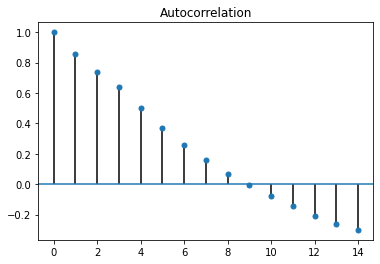

In [6]:
pm.plot_acf(df.Demand)

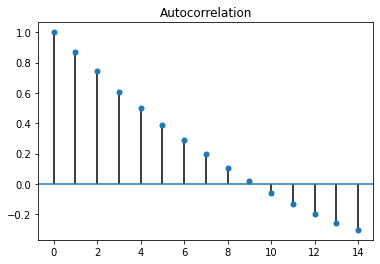

In [7]:
pm.plot_acf(df.Population)

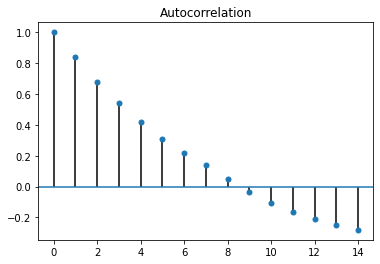

In [8]:
pm.plot_acf(df.GDP)

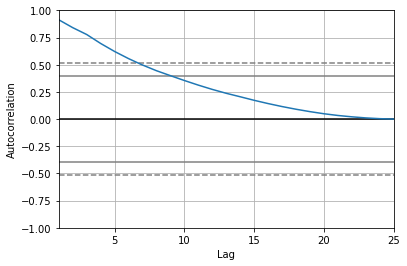

In [9]:
#check autocorrelation using pmdarima
pm.autocorr_plot(df)

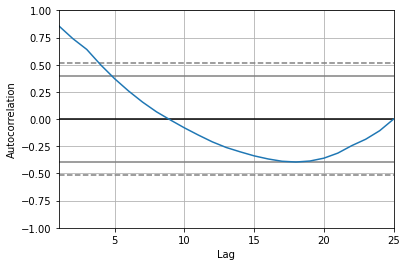

In [10]:
pm.autocorr_plot(df.Demand)

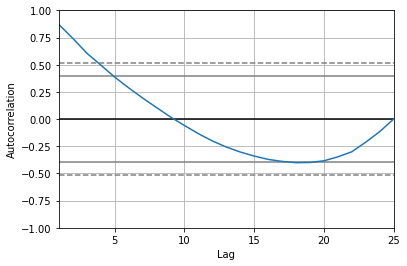

In [11]:
pm.autocorr_plot(df.Population)

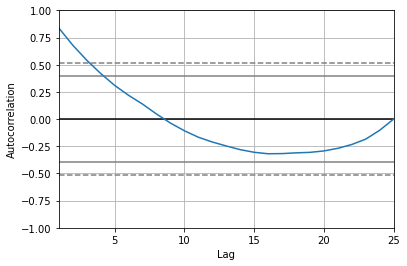

In [12]:
pm.autocorr_plot(df.GDP)

In [15]:
exgo=df[['Population','GDP']]
print(exgo)


            Population   GDP
Year                        
1994-01-01         117   300
1995-01-01         119   329
1996-01-01         120   395
1997-01-01         127   401
1998-01-01         128   407
1999-01-01         130   410
2000-01-01         132   418
2001-01-01         134   415
2002-01-01         133   413
2003-01-01         135   446
2004-01-01         137   475
2005-01-01         139   499
2006-01-01         141   510
2007-01-01         143   558
2008-01-01         145   635
2009-01-01         146   702
2010-01-01         148   781
2011-01-01         152   862
2012-01-01         154   883
2013-01-01         156   982
2014-01-01         159  1119
2015-01-01         161  1248
2016-01-01         163  1402
2017-01-01         164  1564
2018-01-01         166  1698


In [16]:
train, test = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
print(train)

            Demand  Population  GDP
Year                               
1994-01-01    2038         117  300
1995-01-01    2220         119  329
1996-01-01    2419         120  395
1997-01-01    2638         127  401
1998-01-01    2881         128  407
1999-01-01    3149         130  410
2000-01-01    3394         132  418
2001-01-01    3659         134  415
2002-01-01    3947         133  413
2003-01-01    4259         135  446
2004-01-01    4597         137  475
2005-01-01    4693         139  499
2006-01-01    5112         141  510
2007-01-01    5569         143  558
2008-01-01    6066         145  635
2009-01-01    6454         146  702
2010-01-01    6765         148  781
2011-01-01    7518         152  862
2012-01-01    8349         154  883
2013-01-01    9268         156  982


In [21]:
arima = pm.auto_arima(df.Demand, start_p=1,exogenous=exgo, start_q=1,
                           max_p=5, max_q=5, 
                           seasonal=False,
                           d=1,  trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(arima.aic())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=370.295, BIC=377.363, Time=0.263 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=367.414, BIC=372.127, Time=0.044 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=369.231, BIC=375.121, Time=0.124 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=366.565, BIC=372.456, Time=0.210 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=367.138, BIC=370.672, Time=0.039 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=362.218, BIC=369.287, Time=0.212 seconds
Near non-invertible roots for order (0, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=365.490, BIC=373.736, Time=0.309 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the bo

In [25]:
arima.fit(df.Demand,exogenous=exgo)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [26]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -175.109
Date:                Mon, 13 Apr 2020   AIC                            362.218
Time:                        16:23:37   BIC                            369.287
Sample:                    01-01-1994   HQIC                           364.094
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    273.3985    298.961      0.914      0.360    -312.553     859.351
Population   -26.4179    143.160     -0.185      0.854    -307.006     254.170
GDP            4.3209      2.225      1.942      0.052      -0.040       8.682
ma.L1         -0.4146      0.919     -0.451      0.652      -2.217       1.387
ma.L2         -0.5852      0.836     -0.700      0.484      -2.223       1.053
sigma2      1.157e+05      0.001   1.36e+08      0.000    1.16e+05    1.16e+05
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                24.90
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):              75.22   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+27. Standard errors may be unstable.
"""

In [30]:
forecast = arima.predict(n_periods=5, exogenous=exgo[20:], return_conf_int=False, alpha=0.05)
forecast

array([10953.50861658, 11685.9745131 , 12571.95238917, 13518.91515505,
       14318.4754864 ])